In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

## Plotting Dataset vs. Number of Epochs

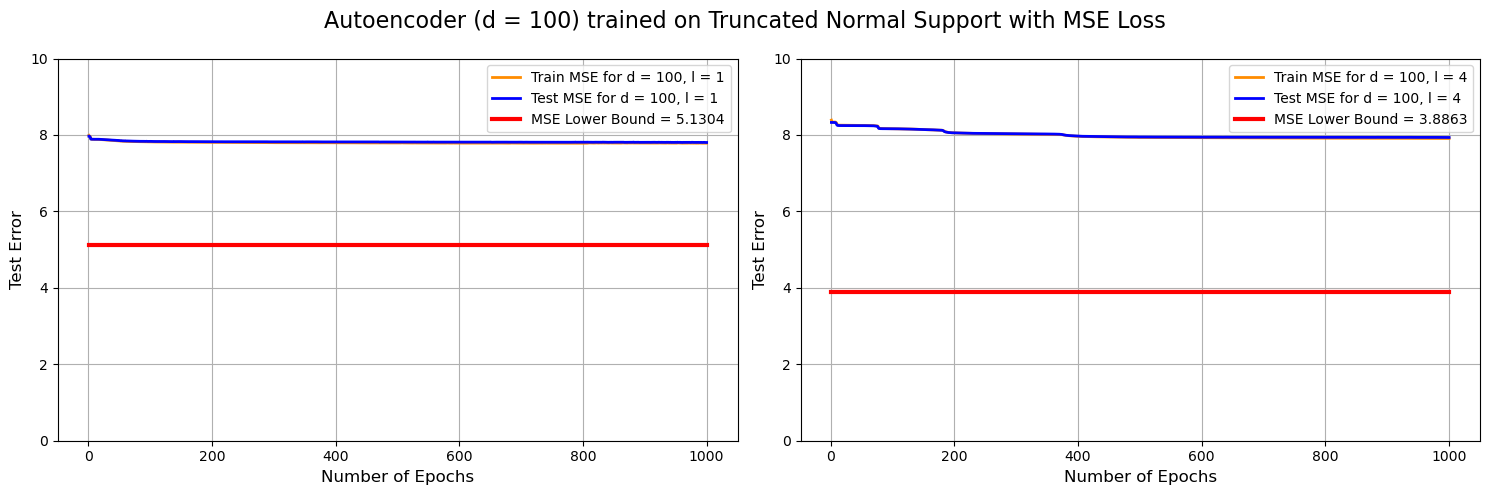

In [39]:
# Initialize parameters
DatasetName = 'TruncatedNormal'
LossFunction = 'MSE' # 'MSEL2'
input_dim = 100 # 784 # 100
latent_dims = [1, 4] # [10, 100, 300] # [1, 4, 30]
num_hidden = 1
train_size = 100000
batch_size = 1000
epochs = 1000
iterations = 1

# Creating a 2x3 subplot structure
fig, axs = plt.subplots(1, len(latent_dims), figsize=(15, 5))  # Adjust the figure size as needed

if DatasetName == 'Uniform':
    # For a d-dimensional vector
    total_variance = np.repeat(input_dim * (1/12), repeats=epochs)
    
    if LossFunction == 'MSE':
        fig.suptitle(f'Autoencoder (d = {input_dim}) trained on Uniform Support with MSE Loss', fontsize=16)
    elif LossFunction == 'MSEL2':
        fig.suptitle(f'Autoencoder (d = {input_dim}) trained on Uniform Support with MSE Loss + L2 Regularization', fontsize=16)

    
elif DatasetName == 'TruncatedNormal':
    # For a d-dimensional vector
    total_variance = np.repeat(input_dim * truncnorm.var(0, 1, loc=0, scale=1), repeats=epochs)

    if LossFunction == 'MSE':
        fig.suptitle(f'Autoencoder (d = {input_dim}) trained on Truncated Normal Support with MSE Loss', fontsize=16)
    elif LossFunction == 'MSEL2':
        fig.suptitle(f'Autoencoder (d = {input_dim}) trained on Truncated Normal Support with MSE Loss + L2 Regularization', fontsize=16)

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over latent dimensions and subplots
for i, latent_dim in enumerate(latent_dims):
    # Read X, Y, and Z for each latent_dim
    X = pd.read_csv(f'TRAIN_{DatasetName}_{LossFunction}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
    Y = pd.read_csv(f'TEST_{DatasetName}_{LossFunction}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
    Z = pd.read_csv(f'LB_{DatasetName}_{LossFunction}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

    # Calculate mean and confidence interval for X
    mean_X = X.mean(axis=0)
    ci_X = 1.96 * X.std(axis=0) / len(X)  # Assuming 95% CI
    
    # Calculate mean and confidence interval for Y
    mean_Y = Y.mean(axis=0)
    ci_Y = 1.96 * Y.std(axis=0) / len(Y)  # Assuming 95% CI
    
    # Calculate mean and confidence interval for Z
    mean_Z = Z.mean(axis=0)
    
    # Plotting for Y on subplot i
    axs[i].fill_between(range(1, epochs + 1), mean_X - ci_X, mean_X + ci_X, alpha=0.1)
    axs[i].plot(range(1, epochs + 1), mean_X, '-', label=f"Train MSE for d = {input_dim}, l = {latent_dim}", color='darkorange', linewidth=2)

    # Plotting for Y on subplot i
    axs[i].fill_between(range(1, epochs + 1), mean_Y - ci_Y, mean_Y + ci_Y, alpha=0.2)
    axs[i].plot(range(1, epochs + 1), mean_Y, '-', label=f"Test MSE for d = {input_dim}, l = {latent_dim}", color='blue', linewidth=2)

    # Plotting for Z on subplot i
    axs[i].plot(range(1, epochs + 1), mean_Z, '-', label=f"MSE Lower Bound = {mean_Z[0].round(4)}", color='red', linewidth=3)
    
    # Additional settings for each subplot
    axs[i].set_xlabel("Number of Epochs", fontsize=12)
    axs[i].set_ylabel("Test Error", fontsize=12)
    axs[i].set_ylim(0, 10) # 80 # 10
    axs[i].legend(prop={'size': 10},loc='upper right')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
# Step 1: Read the CSV files
DatasetName = 'Uniform'
task = 'Regression'
loss = 'MSE'
input_dim = 100
latent_dim = 2
num_hidden = 0
train_size = 2
batch_size = 2
epochs = 250
iterations = 5

X = pd.read_csv(f'TRAIN_{task}_{DatasetName}_{loss}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Y = pd.read_csv(f'TEST_{task}_{DatasetName}_{loss}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Z = pd.read_csv(f'LB_{task}_{DatasetName}_{loss}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
A = pd.read_csv(f'TRAIN_REG_{task}_{DatasetName}_{loss}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
B = pd.read_csv(f'TEST_REG_{task}_{DatasetName}_{loss}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

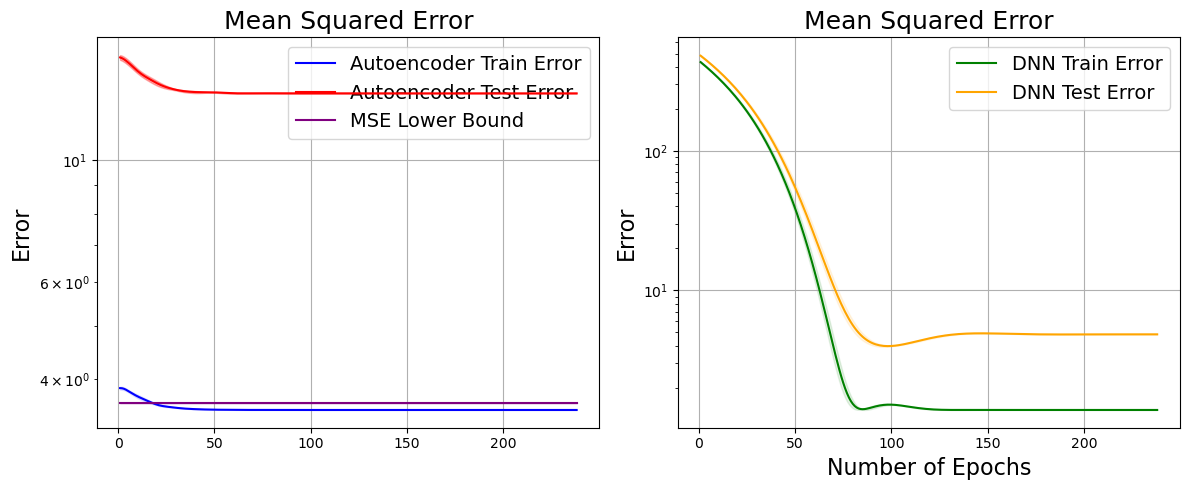

In [26]:
# Step 2: Compute means and 95% confidence intervals
def compute_mean_and_CI(data):
    mean = np.mean(data, axis=0)
    std_error = np.std(data, axis=0) / np.sqrt(data.shape[0])  # Standard error of the mean
    stdev = np.std(data, axis=0)
    ci = 1.96 * std_error  # 95% CI for a normal distribution
    return mean, ci, stdev

# Assuming A, B, X, Y, Z are already defined and have at least 13 columns
A = A[:,12:]; B = B[:,12:]
mean_A, ci_A, stdev_A = compute_mean_and_CI(A)
mean_B, ci_B, stdev_B = compute_mean_and_CI(B)
X = X[:,12:]; Y = Y[:,12:]; Z = Z[:,12:]
mean_X, ci_X, stdev_X = compute_mean_and_CI(X)
mean_Y, ci_Y, stdev_Y = compute_mean_and_CI(Y)
mean_Z, ci_Z, stdev_Z = compute_mean_and_CI(Z)

# Step 3: Plot the results using subplots
epochs_all = list(range(1, X.shape[1] + 1))
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Subplot 1: X, Y, Z
ax1 = axes[0]
# Plotting for X
ax1.fill_between(epochs_all, mean_X - ci_X, mean_X + ci_X, color='blue', alpha=0.1, zorder=0)
ax1.plot(epochs_all, mean_X, 'b-', label="Autoencoder Train Error", zorder=20)

# Plotting for Y
ax1.fill_between(epochs_all, mean_Y - ci_Y, mean_Y + ci_Y, color='red', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Y, 'r-', label="Autoencoder Test Error", zorder=30)

# Plotting for Z
ax1.fill_between(epochs_all, mean_Z - ci_Z, mean_Z + ci_Z, color='purple', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Z, '-', color='purple', label="MSE Lower Bound", zorder=30)

# Additional settings for Subplot 1
ax1.set_ylabel("Error", fontsize=16)
ax1.set_yscale('log')
ax1.legend(prop={'size': 14}, loc='upper right')
ax1.grid(True)
ax1.set_title("Mean Squared Error", fontsize=18)

# Subplot 2: A, B
ax2 = axes[1]
# Plotting for A
ax2.fill_between(epochs_all, mean_A - ci_A, mean_A + ci_A, color='green', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_A, 'g-', label="DNN Train Error", zorder=20)

# Plotting for B
ax2.fill_between(epochs_all, mean_B - ci_B, mean_B + ci_B, color='orange', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_B, '-', color='orange', label="DNN Test Error", zorder=20)

# Additional settings for Subplot 2
ax2.set_xlabel("Number of Epochs", fontsize=16)
ax2.set_ylabel("Error", fontsize=16)
ax2.set_yscale('log')
ax2.legend(prop={'size': 14}, loc='upper right')
ax2.grid(True)
ax2.set_title("Mean Squared Error", fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
plt.savefig('test_subplots.png', bbox_inches='tight')
plt.show()